# Lecture 1 - A two-sample t-test
Updated Sep 8, 2023

## Specify the DGP for a continuous response
   We will consider an experimental design where the subjects response is continuous.

   We will start by simulating the sample.

* 1) Fix the sample size $n$

In [2]:
n <- 100
set.seed(1) # also, set the random number seed so that the results are consistent each time you run the simulation.
# If you want a different draw from the sample, you have to the let the seed change. The seed will change automatically every time you draw a set of random numbers (i.e. using rnorm below)

* 2) Obtain $n$ values for the treatment $W$.

In [3]:
W <-rbinom(n,1,.5) #creates values for the treatment

* 3) Choose parameters for $f()$. Example: $\beta_0=1, \beta_1=2$

In [4]:
beta0 <- 1
beta1 <- 2

* 4) Evalute successive values for $\beta_0 + \beta_1x_i, \quad i=[1,\dots,n]$

In [5]:
f <- beta0 + beta1*W

* 5) Choose a probability distribution for $\epsilon$. If necessary specify parameters such as its mean and variance.

In [6]:
mu <- 0
sigma <- 20

### Simulate a Sample
* 6) Use a random number generator to generate the $n$ succesive and mutually independent values $\epsilon_i$ of the error terms

In [7]:
e <- rnorm(n, mean=mu, sd=sigma) # this draws from the normal density with mean mu and standard deviation sigma

* 7) Form the $n$ succesive values for $Y$ denoted $[y_1,\dots,y_n]$

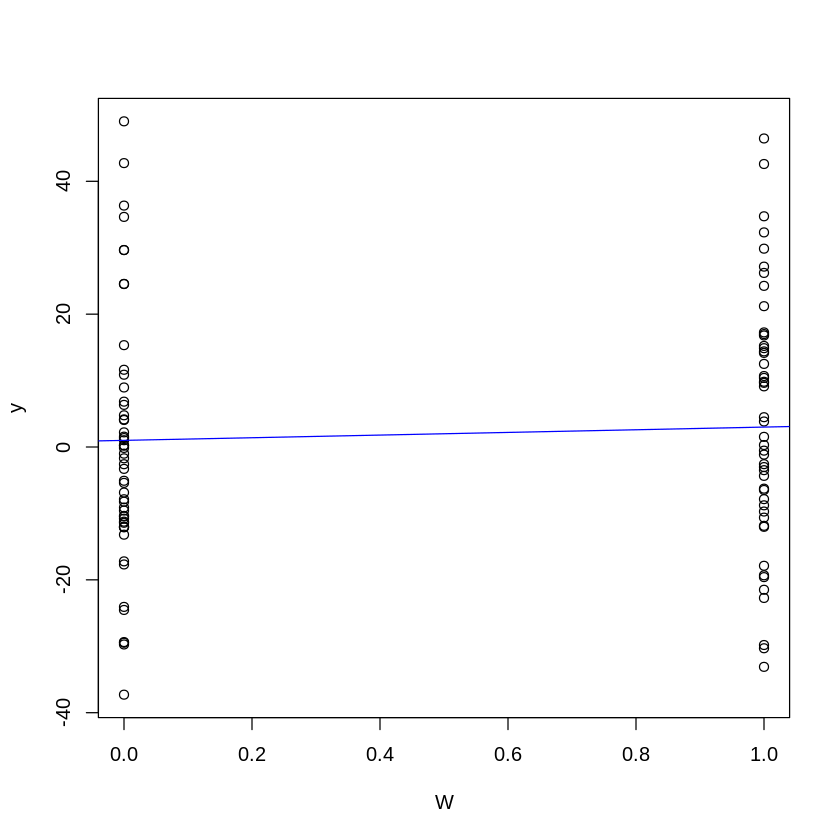

In [8]:
y <- f+e
plot(W,y)
abline(a=1,b=2,col="blue")

Draw a new set of errors. Will they be the same or different?

In [9]:
e <- rnorm(n, mean=mu, sd=sigma) # draw a new set of random numbers from the normal density with mean mu and standard deviation sigma

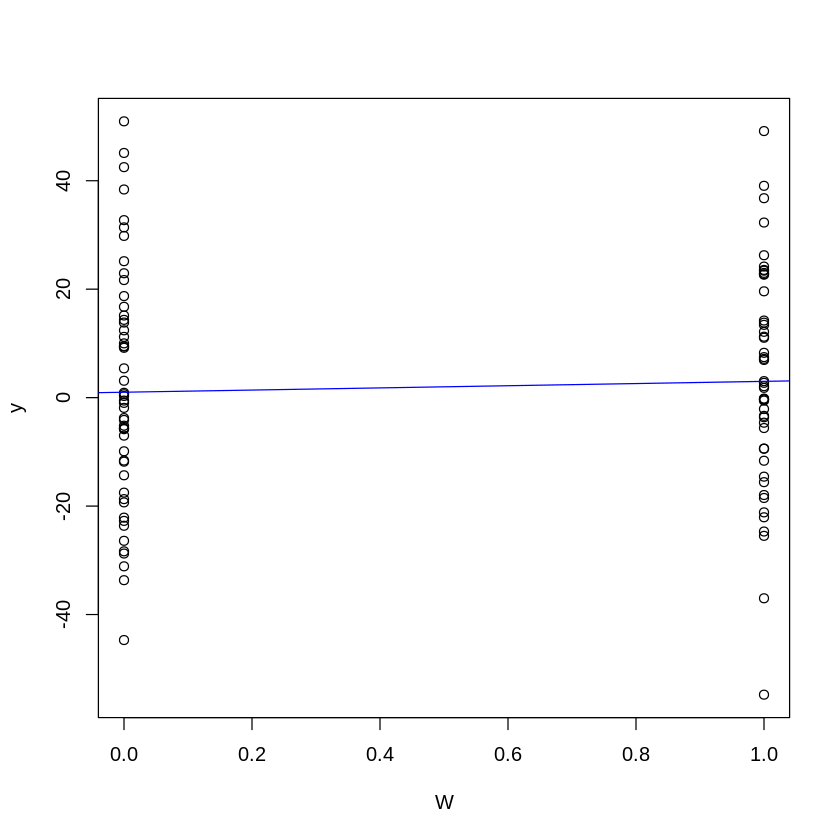

In [10]:
y <- f+e
plot(W,y)
abline(a=1,b=2,col="blue")

##Now we will do the same thing for a disrete response (like a binary choice, or a rating scale).

In [32]:
M<-10
b1 <- .5
b2 <- .2
p <- b1 + W*b2
y <- rbinom(n,M,p) # the rbinom() function draws a binary [0,1] with probability p,  M times.

In [34]:
t.test(y ~ W, var.equal=TRUE)



	Two Sample t-test

data:  y by W
t = -7.8615, df = 98, p-value = 5.004e-12
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -2.868872 -1.712421
sample estimates:
mean in group 0 mean in group 1 
       4.943396        7.234043 


In [35]:
summary(lm(y~W))


Call:
lm(formula = y ~ W)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9434 -0.9434  0.0566  0.7660  4.0566 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.9434     0.1998  24.747   <2e-16 ***
W             2.2906     0.2914   7.861    5e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.454 on 98 degrees of freedom
Multiple R-squared:  0.3867,	Adjusted R-squared:  0.3805 
F-statistic:  61.8 on 1 and 98 DF,  p-value: 5.004e-12


In [38]:
t.test(y ~ W, var.equal=FALSE)


	Welch Two Sample t-test

data:  y by W
t = -7.9788, df = 96.465, p-value = 3.068e-12
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -2.860484 -1.720809
sample estimates:
mean in group 0 mean in group 1 
       4.943396        7.234043 


In [39]:

summary(nlme::gls(y ~ 1 + W, weights = nlme::varIdent(form=~1|W), method="ML"))


Generalized least squares fit by maximum likelihood
  Model: y ~ 1 + W 
  Data: NULL 
       AIC      BIC    logLik
  361.5984 372.0191 -176.7992

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | W 
 Parameter estimates:
        0         1 
1.0000000 0.7782897 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 4.943396 0.2213119 22.336790       0
W           2.290646 0.2871143  7.978169       0

 Correlation: 
  (Intr)
W -0.771

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.60524646 -0.59147787  0.03548867  0.61703206  2.54335482 

Residual standard error: 1.594981 
Degrees of freedom: 100 total; 98 residual